# Customer Churn Analysis & Behavioral Visualization

## Overview
This project explores customer churn patterns in a telecom subscription dataset using focused, visualization-driven analysis. The goal is to understand **who churns, when they churn, and which factors most strongly influence customer retention**, using clear and interpretable visual insights.

---

## Key Questions Explored
- How does churn vary across the customer lifecycle?
- Do pricing and billing behavior influence churn risk?
- How do contract types and payment methods affect retention?
- What role does service quality (e.g., tech support, internet service) play in churn?

---

## Approach
Rather than building predictive models, this analysis emphasizes **exploratory data visualization** to uncover meaningful patterns. Each visualization is designed to answer a specific business question, combining distribution plots, proportional comparisons, and correlation analysis to explain churn behavior.

---

## Business Takeaways
- Churn is highest during the **early stages of customer tenure** and declines with long-term engagement.
- Customers with **higher monthly charges** exhibit greater churn risk, suggesting price sensitivity.
- **Longer contracts** and **automatic payment methods** are associated with stronger retention.
- **Service quality**, particularly access to tech support, plays a significant role in reducing churn.

---

## Tools
Python, Pandas, Matplotlib, Seaborn

---

## Outcome
The analysis produces a concise, insight-driven view of customer churn, demonstrating how effective data visualization can translate raw customer data into **actionable retention insights**.


In [9]:
import pandas as pd
import numpy as np
import os

In [13]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yeanzc/telco-customer-churn-ibm-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/aaniaadap/.cache/kagglehub/datasets/yeanzc/telco-customer-churn-ibm-dataset/versions/1


In [28]:
# Find CSV file
files = os.listdir(path)
print(files)

# Load dataset
df = pd.read_excel(os.path.join(path, "Telco_customer_churn.xlsx"))
df.head()


['Telco_customer_churn.xlsx']


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [29]:
df.shape

(7043, 33)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [207]:
for column in df.columns:
    print(df[column].value_counts())
    print()

CustomerID
3668-QPYBK    1
9169-BSVIN    1
0206-OYVOC    1
6418-HNFED    1
8805-JNRAZ    1
             ..
6797-UCJHZ    1
5016-IBERQ    1
3003-CMDUU    1
5148-HKFIR    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64

Count
1    7043
Name: count, dtype: int64

Country
United States    7043
Name: count, dtype: int64

State
California    7043
Name: count, dtype: int64

City
Los Angeles       305
San Diego         150
San Jose          112
Sacramento        108
San Francisco     104
                 ... 
Healdsburg          4
Jenner              4
Philo               4
Point Arena         4
Olympic Valley      4
Name: count, Length: 1129, dtype: int64

Zip Code
90003    5
91436    5
91916    5
91913    5
91911    5
        ..
95303    4
95251    4
95250    4
95246    4
96146    4
Name: count, Length: 1652, dtype: int64

Lat Long
33.964131, -118.272783    5
34.152875, -118.486056    5
32.912664, -116.635387    5
32.64164, -116.985026     5
32.607964, -117.059459    5
            

In [31]:
#Converting "Total Charges" from object to float

# here, coerce forces invalid values to become = 'NaN' instead of throwing errors

df["Total Charges"] = pd.to_numeric(df["Total Charges"],errors='coerce')

In [32]:
df.isna().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [33]:
df["Churn Reason"].value_counts()

Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: c

**Here, the only column with null values is "Churn Reason".**

In [34]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,2283.300441,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,2266.771362,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,18.800000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,401.450000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,1397.475000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,3794.737500,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


In [35]:
df["Tenure Months"].value_counts()

Tenure Months
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

In [36]:
df[df["Tenure Months"] == 0 ]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
2234,4472-LVYGI,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,...,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,0,36,2578,NaN
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,...,Two year,No,Mailed check,20.25,NaN,No,0,68,5504,NaN
2568,5709-LVOEQ,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,...,Two year,No,Mailed check,80.85,NaN,No,0,45,2048,NaN
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,...,Two year,No,Mailed check,25.75,NaN,No,0,48,4950,NaN
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,...,Two year,No,Credit card (automatic),56.05,NaN,No,0,30,4740,NaN
4331,7644-OMVMY,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,Two year,No,Mailed check,19.85,NaN,No,0,53,2019,NaN
4687,3213-VVOLG,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,...,Two year,No,Mailed check,25.35,NaN,No,0,49,2299,NaN
5104,2520-SGTTA,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,...,Two year,No,Mailed check,20.00,NaN,No,0,27,3763,NaN
5719,2923-ARZLG,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,...,One year,Yes,Mailed check,19.70,NaN,No,0,69,4890,NaN
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,...,Two year,No,Mailed check,73.35,NaN,No,0,44,2342,NaN


**Here, we notice that Tenure Months being 0, corresponds to the fact that the Total Charges are NaN values**

In [37]:
#Replacing NaN Values with in Total Charges with 0

df["Total Charges"] = df["Total Charges"].fillna(0)

In [39]:
# Target Variable

df["Churn Label"].value_counts()

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

# Visualisation Analysis

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

##  How does the churn change as the customer tenure increases?

In [54]:
df["Tenure Months"].unique()

array([ 2,  8, 28, 49, 10,  1, 47, 17,  5, 34, 11, 15, 18,  9,  7, 12, 25,
       68, 55, 37,  3, 27, 20,  4, 58, 53, 13,  6, 19, 59, 16, 52, 24, 32,
       38, 54, 43, 63, 21, 69, 22, 61, 60, 48, 40, 23, 39, 35, 56, 65, 33,
       30, 45, 46, 62, 70, 50, 44, 71, 26, 14, 41, 66, 64, 29, 42, 67, 51,
       31, 57, 36, 72,  0])

In [55]:
df["Tenure Months"].unique().max()

72

In [56]:
df['Tenure Group'] = pd.cut(
df["Tenure Months"], bins = [0,12,24,36,49,60,72], labels = ['0-1 Years', '1 - 2 Years', '2-3 Years', '3 - 4 Years', '4 - 5 Years', '5 - 6 Years'])

In [59]:
churn_by_tenure = df.groupby('Tenure Group')['Churn Value'].mean().reset_index()
churn_by_tenure

/var/folders/9q/34twht415s37blhsfyy54d6w0000gn/T/ipykernel_91942/2583141505.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_tenure = df.groupby('Tenure Group')['Churn Value'].mean().reset_index()


,Tenure Group,Churn Value
0,0-1 Years,0.476782
1,1 - 2 Years,0.287109
2,2-3 Years,0.216346
3,3 - 4 Years,0.193237
4,4 - 5 Years,0.137076
5,5 - 6 Years,0.066098


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


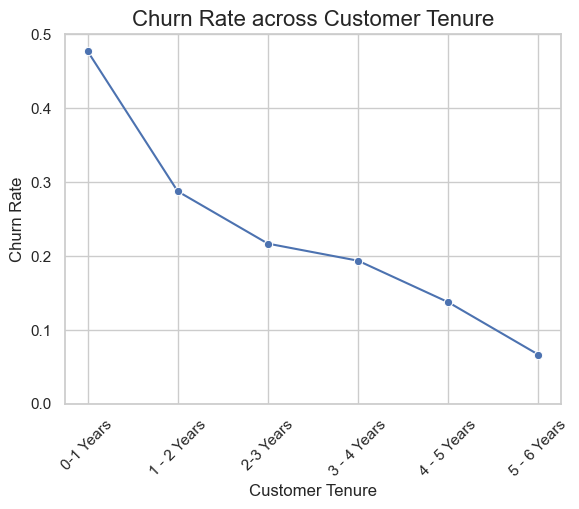

In [208]:
# Plotting the line chart

sns.set(style = 'whitegrid')

plt.figure (figure = (10,6))

sns.lineplot(
data=churn_by_tenure, x = 'Tenure Group', y = 'Churn Value' , marker = 'o'
)

plt.title("Churn Rate across Customer Tenure", fontsize = 16)
plt.xlabel("Customer Tenure")
plt.xticks(rotation = 45)
plt.ylabel("Churn Rate")
plt.ylim(0,0.5)

plt.show()

**Insight**: Here, the highest churn, on average, takes place in the first year. and there after there is a steady decline as the tenure period increases, showing that there is a very low churn after longer contracts. 

## Monthly Charges vs. Churn

In [77]:
df["Monthly Charges"].value_counts()

Monthly Charges
20.05     61
19.85     45
19.95     44
19.90     44
19.65     43
          ..
112.55     1
117.15     1
29.40      1
67.40      1
78.70      1
Name: count, Length: 1585, dtype: int64

Monthly Charges is continuos and Churn is binary thus a box + violin plot is a suitable plot. 

In [78]:
df[['Monthly Charges' , 'Churn Value']].describe()

,Monthly Charges,Churn Value
count,7043.000000,7043.000000
mean,64.761692,0.265370
std,30.090047,0.441561
min,18.250000,0.000000
25%,35.500000,0.000000
50%,70.350000,0.000000
75%,89.850000,1.000000
max,118.750000,1.000000


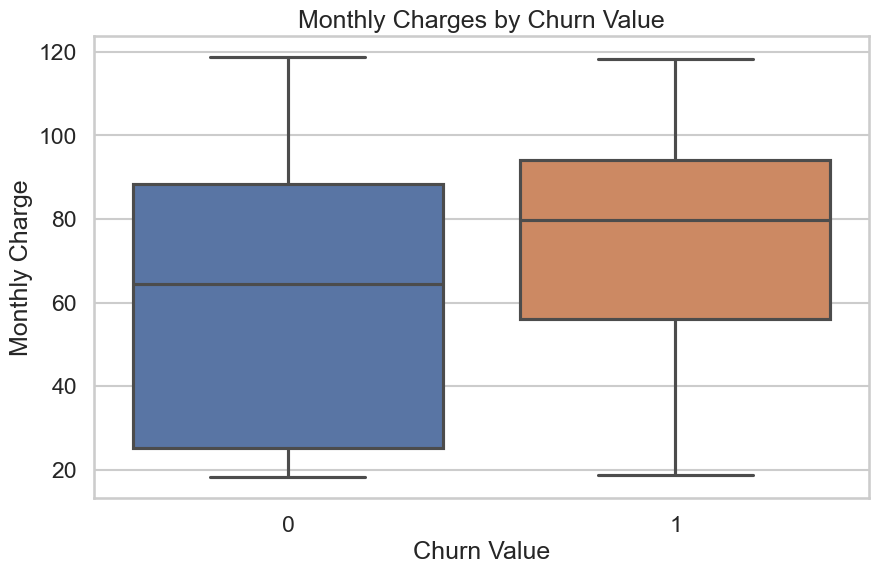

In [84]:
plt.figure(figsize=(10,6))

sns.boxplot(data=df, x= 'Churn Value', y ='Monthly Charges')


plt.title("Monthly Charges by Churn Value")
plt.xlabel("Churn Value")
plt.ylabel("Monthly Charge")

plt.show()

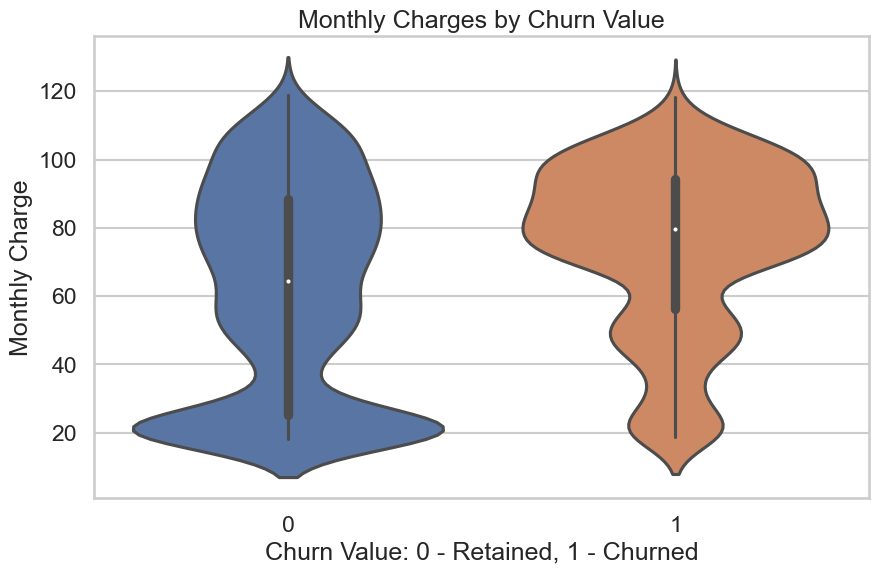

In [86]:
plt.figure(figsize=(10,6))

sns.violinplot(data=df, x= 'Churn Value', y ='Monthly Charges')


plt.title("Monthly Charges by Churn Value")
plt.xlabel("Churn Value: 0 - Retained, 1 - Churned")
plt.ylabel("Monthly Charge")

plt.show()

**Insight**: Customers who churn seem to have higher monthly charges than the ones who are retained. 
- One good assumption would be that higher monthly charges compell customers to churn. 

## Contract Type vs Churn

In [129]:
#For each contract type how many were churned and how many were retained

contract_churn_wide = pd.crosstab(df['Contract'], df['Churn Value'], normalize='index').reset_index()

contract_churn = contract_churn_wide.melt(
    id_vars='Contract',
    value_vars=[0, 1],
    var_name='Churn Value',
    value_name='proportion'
)

contract_churn['Churn Value'] = contract_churn['Churn Value'].map({0: 'Retained', 1: 'Churned'})
contract_churn

,Contract,Churn Value,proportion
0,Month-to-month,Retained,0.572903
1,One year,Retained,0.887305
2,Two year,Retained,0.971681
3,Month-to-month,Churned,0.427097
4,One year,Churned,0.112695
5,Two year,Churned,0.028319


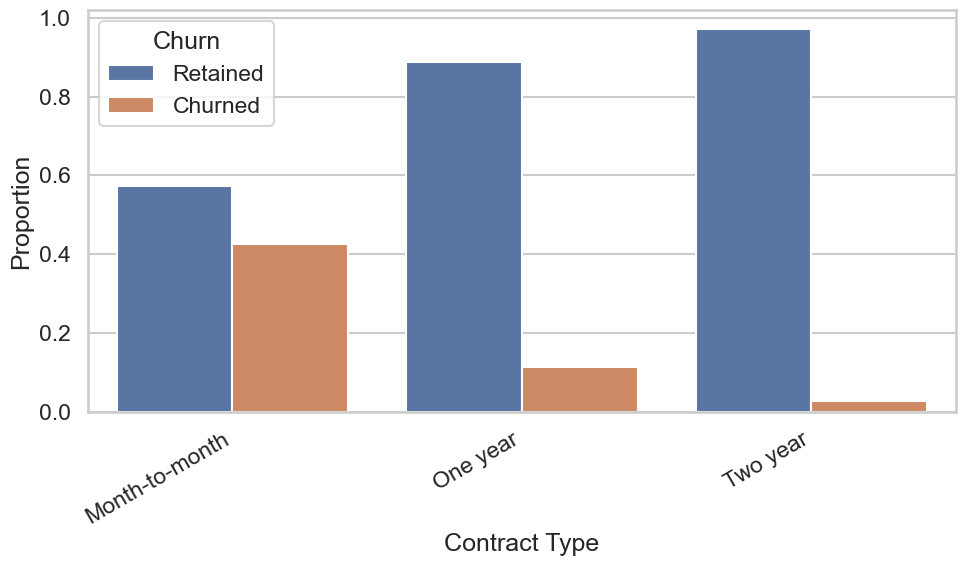

In [128]:
plt.figure(figsize=(10,6))

sns.barplot(
    data=contract_churn,
    x='Contract',
    y='proportion',
    hue='Churn Value'
)

plt.xlabel("Contract Type")
plt.ylabel("Proportion")
plt.xticks(rotation=30, ha='right')
plt.legend(title="Churn")
plt.tight_layout()
plt.show()

## Payment Method Vs Churn

In [132]:
df["Payment Method"].value_counts()

Payment Method
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [133]:
df["Churn Value"].value_counts()

Churn Value
0    5174
1    1869
Name: count, dtype: int64

In [138]:
payment_churn = pd.crosstab(df["Payment Method"],df['Churn Value'],normalize='index').reset_index()
payment_churn

payment_churn = payment_churn.melt(
    id_vars = 'Payment Method',
    value_vars=[0, 1],
    var_name='Churn Value',
    value_name='proportion')

payment_churn['Churn Value'] = payment_churn['Churn Value'].map({0: 'Retained', 1: 'Churned'})

payment_churn

,Payment Method,Churn Value,proportion
0,Bank transfer (automatic),Retained,0.832902
1,Credit card (automatic),Retained,0.847569
2,Electronic check,Retained,0.547146
3,Mailed check,Retained,0.808933
4,Bank transfer (automatic),Churned,0.167098
5,Credit card (automatic),Churned,0.152431
6,Electronic check,Churned,0.452854
7,Mailed check,Churned,0.191067


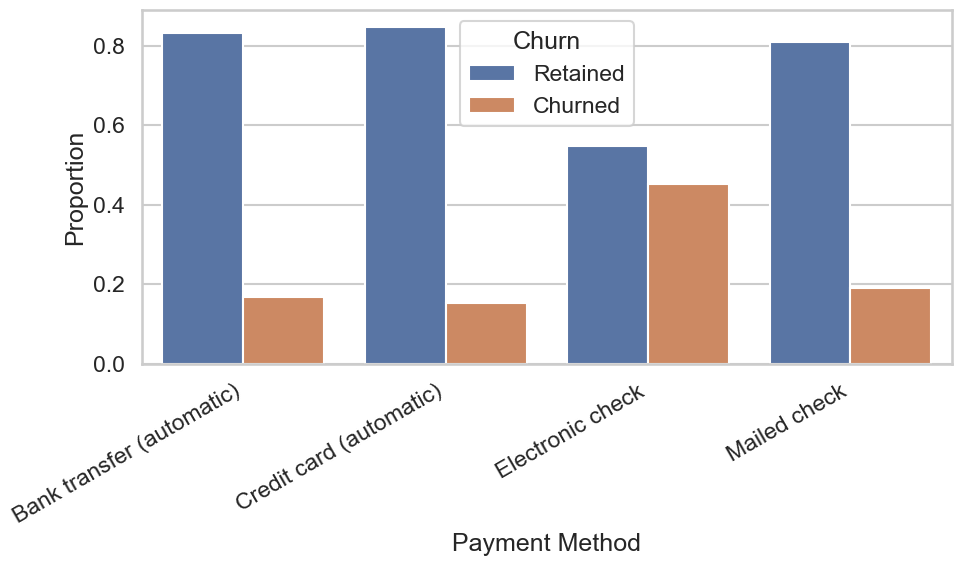

In [141]:
plt.figure(figsize=(10,6))

sns.barplot(
    data=payment_churn,
    x='Payment Method',
    y='proportion',
    hue='Churn Value'
)

plt.xlabel("Payment Method")
plt.ylabel("Proportion")
plt.xticks(rotation=30, ha='right')
plt.legend(title="Churn")
plt.tight_layout()
plt.show()

## Service Usage vs Churn

In [142]:
df['Internet Service'].value_counts()

Internet Service
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [153]:
internet_churn = pd.crosstab(
    df['Internet Service'],
    df["Churn Value"],
    normalize='index').reset_index()

internet_churn = internet_churn.melt(id_vars='Internet Service',value_vars = [0,1], var_name = 'Churn Value',value_name='proportion')

internet_churn['Churn Value'] = internet_churn['Churn Value'].map({0:'Retained',1:'Churned'})


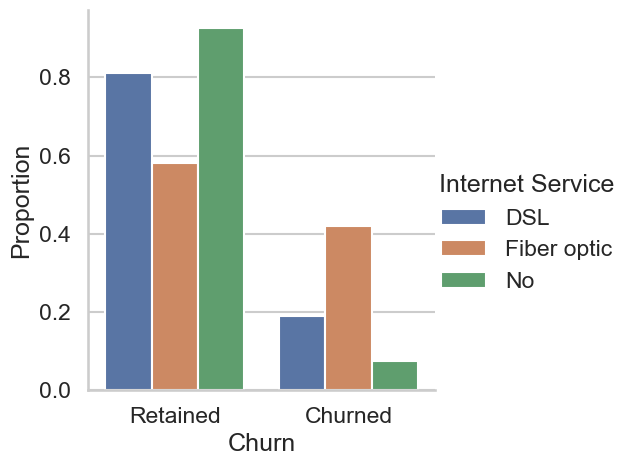

In [157]:

sns.catplot(kind = 'bar',
            data = internet_churn,
           x = 'Churn Value',
           y = 'proportion',
           hue = 'Internet Service')

plt.xlabel("Churn")
plt.ylabel("Proportion")

plt.show()

## Correlation Map

In [158]:
df.select_dtypes([float,int])

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
0,1,90003,33.964131,-118.272783,2,53.85,108.15,1,1,86,3239
1,1,90005,34.059281,-118.307420,2,70.70,151.65,1,1,67,2701
2,1,90006,34.048013,-118.293953,8,99.65,820.50,1,1,86,5372
3,1,90010,34.062125,-118.315709,28,104.80,3046.05,1,1,84,5003
4,1,90015,34.039224,-118.266293,49,103.70,5036.30,1,1,89,5340
...,...,...,...,...,...,...,...,...,...,...,...
7038,1,92285,34.341737,-116.539416,72,21.15,1419.40,0,0,45,5306
7039,1,92301,34.667815,-117.536183,24,84.80,1990.50,0,0,59,2140
7040,1,92304,34.559882,-115.637164,72,103.20,7362.90,0,0,71,5560
7041,1,92305,34.167800,-116.864330,11,29.60,346.45,0,0,59,2793


In [165]:
numeric_cols = df.select_dtypes([float,int])

numeric_cols = numeric_cols.drop(columns=['Count','Zip Code','Latitude','Longitude'])

numeric_cols.head()

,Tenure Months,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
0,2,53.85,108.15,1,1,86,3239
1,2,70.70,151.65,1,1,67,2701
2,8,99.65,820.50,1,1,86,5372
3,28,104.80,3046.05,1,1,84,5003
4,49,103.70,5036.30,1,1,89,5340


In [174]:
numeric_cols.corr().shape

(7, 7)

<Axes: >

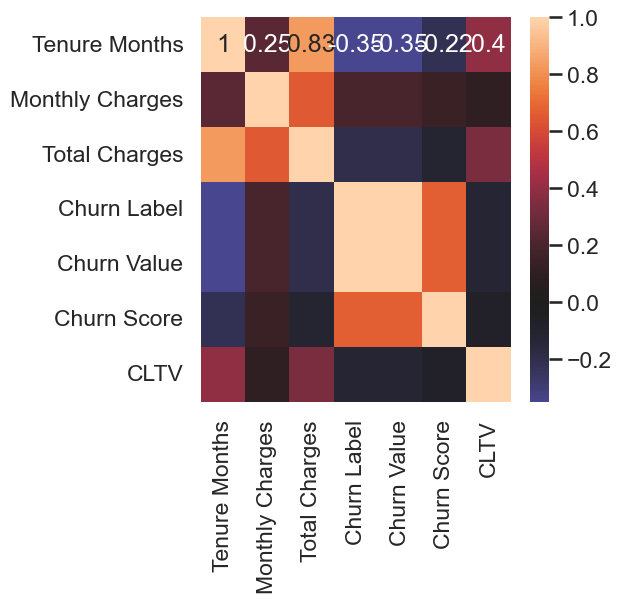

In [178]:
plt.figure(figsize = (5,5))
sns.heatmap(numeric_cols.corr(),annot=True,center=0)

**Insights**: 
- We observe that 'Tenure Months and Total Charges' are positively correlated. Because -> Total Charges ≈ Monthly Charges × Tenure. It shows thatat variables have overlapping information.
- We also observe that Tenure Months vs Churn  Value = -0.35 which shows that, customers wit a longer Tenure  are less likely to churn. 

## Tech Support vs Churn

In [181]:
df['Tech Support'].value_counts()

Tech Support
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

In [205]:
tech_churn = pd.crosstab(df['Tech Support'],df['Churn Value'],normalize='index').reset_index()

tech_churn = tech_churn.melt(id_vars='Tech Support',
                            value_vars=[0,1],
                            value_name='proportion',
                        )

tech_churn['Churn Value'] = tech_churn['Churn Value'].map({0:'Retained',1:'Churned'})

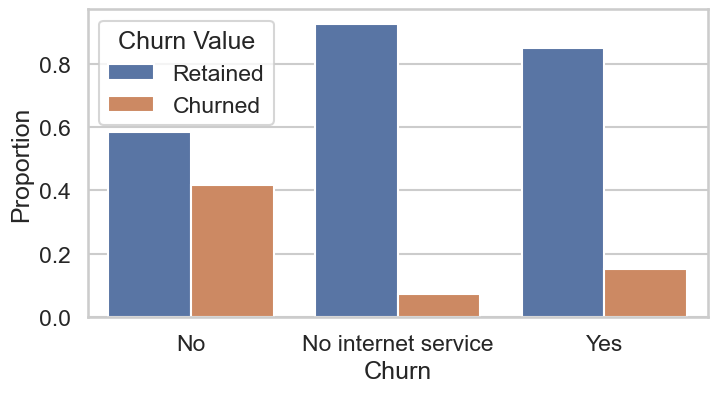

In [206]:
plt.figure(figsize=(8,4))

sns.barplot(data = tech_churn,
           x = 'Tech Support',
           y = 'proportion',
           hue = 'Churn Value'
           )


plt.xlabel("Churn")
plt.ylabel("Proportion")

plt.show()

**Insight**: 
- Customers without tech support churn the most.
- Customers with no internet service tend to churn less

In [202]:
## Tenure Distribution by Churn

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Tenure Months', ylabel='Count'>

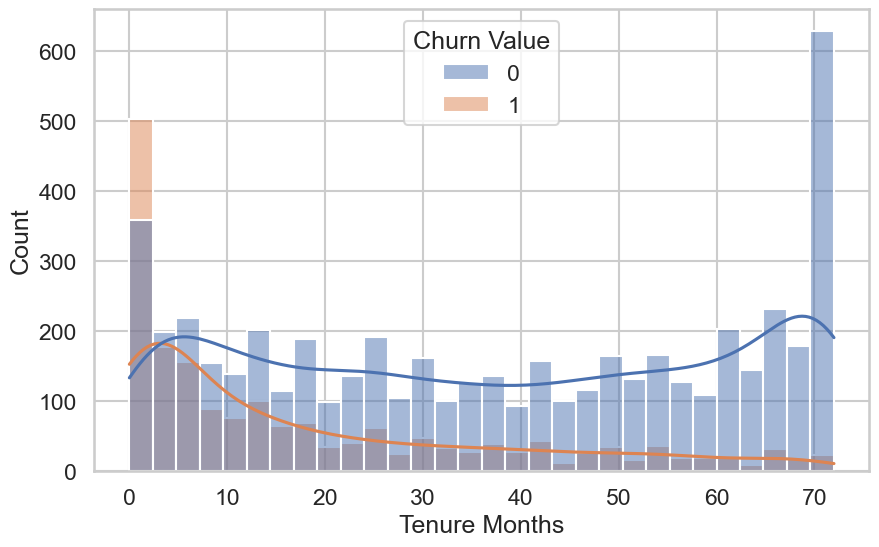

In [204]:
plt.figure(figsize=(10,6))

sns.histplot(data = df,
            x = 'Tenure Months',
            hue = 'Churn Value',
            kde = True,
            bins = 30)

The highest churn takes place in the first month or rather before the forst month is completed. 